<a href="https://colab.research.google.com/github/Ryoma-HCU/Prog2kakushin/blob/main/work3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#プログラム3 (画像処理)：エッジ検出

最初に分析したい画像ファイルを画面左側にある「ファイル」項目内に直下でドラック&ドロップする．

画像ファイルが用意できない場合，下記のプログラムを実行し，サンプル画像をダウンロードする．

In [1]:
!wget "https://drive.google.com/uc?export=download&id=1hsUauww6HMD9YMejBh72as9x9wNCWeBc" -O images.zip
!unzip -o images.zip

--2024-01-23 08:13:52--  https://drive.google.com/uc?export=download&id=1hsUauww6HMD9YMejBh72as9x9wNCWeBc
Resolving drive.google.com (drive.google.com)... 172.217.212.102, 172.217.212.101, 172.217.212.113, ...
Connecting to drive.google.com (drive.google.com)|172.217.212.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1hsUauww6HMD9YMejBh72as9x9wNCWeBc&export=download [following]
--2024-01-23 08:13:52--  https://drive.usercontent.google.com/download?id=1hsUauww6HMD9YMejBh72as9x9wNCWeBc&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.74.132, 2607:f8b0:4001:c0d::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.74.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 391994 (383K) [application/octet-stream]
Saving to: ‘images.zip’

images.zip          100%[===================>] 382.81K  --.-KB/s 

●11個のファイルがあります．
eagle_gray.jpg
dog.jpg
fox.jpg
desert.jpg
flower.jpg
turtle.jpg
canal.jpg
ichidai.jpg
parrot.jpg
eagle.jpg
library.jpg

●上記のファイルの中から分析したい画像を1つ選んでください(拡張子込み)：eagle.jpg

●境界線調査の閾値を入力してください．
0[低]～255[高]：63

●表示する明るさの倍数を入力してください．(大き過ぎる値を入力すると白飛び・オーバーフローする可能性があります)
0以上の整数(基準1)：2

●検知する方向を選択してください．
横方向検知 [0:しない|1:する]：1
縦方向検知 [0:しない|1:する]：1

オリジナル


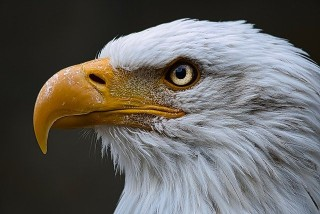

横方向検知　[閾値表示|全体表示]


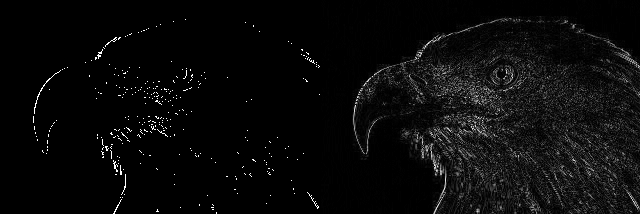

縦方向検知　[閾値表示|全体表示]


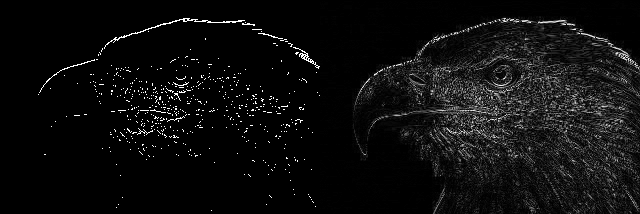

横,縦 合成　[閾値表示|全体表示]


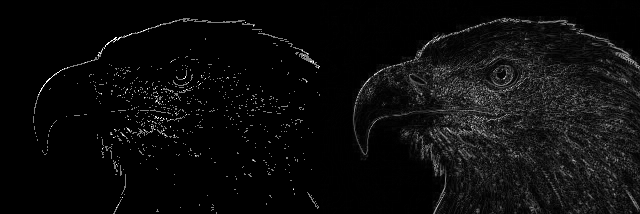

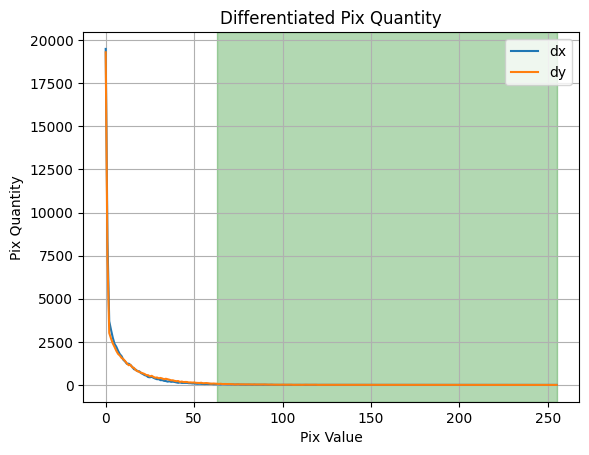

In [6]:
import cv2
from google.colab.patches import cv2_imshow
import glob
import sys
import numpy as np
from matplotlib import pyplot as plt

# 横方向の画素値差分を計算, それを画素値として新たに画像入力
def Horizontal_detection(img, th, h, w, lm):
  img_edge1 = np.zeros( (h, w), np.uint8 )
  img_edge2 = np.zeros( (h, w), np.uint8 )
  quan = np.zeros(256)
  for iy in range(h):
    for ix in range(w-1):
      dif = np.int32(img[iy,ix+1]) - np.int32(img[iy,ix])
      if np.abs(dif) >= th:
        img_edge1[iy,ix+1] = 255
      img_edge2[iy,ix+1] = np.abs(dif)*lm
      quan[np.abs(dif)] += 1
  return img_edge1, img_edge2, quan

# 縦方向の画素値差分を計算, それを画素値として新たに画像入力
def Vertical_detection(img, th, h, w, lm):
  img_edge1 = np.zeros( (h, w), np.uint8 )
  img_edge2 = np.zeros( (h, w), np.uint8 )
  quan = np.zeros(256)
  for ix in range(w):
    for iy in range(h-1):
      dif = np.int32(img[iy+1,ix]) - np.int32(img[iy,ix])
      if np.abs(dif) >= th:
        img_edge1[iy+1,ix] = 255
      img_edge2[iy+1,ix] = np.abs(dif)*lm
      quan[np.abs(dif)] += 1
  return img_edge1, img_edge2, quan


# 項目表示
file_list = glob.glob("*.jpg")
print(f'●{len(file_list)}個のファイルがあります．')
for file in file_list:
  print(f'{file}' )
print()

# ファイル名入力
fname = input("●上記のファイルの中から分析したい画像を1つ選んでください(拡張子込み)：")
img = cv2.imread(fname)
if img is None:
  sys.exit("エラー: ファイルを開けませんでした")
print()

h = img.shape[0]
w = img.shape[1]
img_gray = cv2.cvtColor( img, cv2.COLOR_BGR2GRAY )

# 数値入力
print("●境界線調査の閾値を入力してください．")
while True:
  edge = int(input("0[低]～255[高]："))
  if 0 <= edge <= 255:
    break
  else:
    print("正しい値を入力してください．")
print()
print("●表示する明るさの倍数を入力してください．(大き過ぎる値を入力すると白飛び・オーバーフローする可能性があります)")
while True:
  bright = int(input("0以上の整数(基準1)："))
  if 0 <= bright:
    break
  else:
    print("正しい値を入力してください．")
print()
print("●検知する方向を選択してください．")
while True:
  dx = int(input("横方向検知 [0:しない|1:する]："))
  dy = int(input("縦方向検知 [0:しない|1:する]："))
  if (dx==0 or dx==1) and (dy==0 or dy==1):
    break
  else:
    print("正しい値を入力してください．")
print()

# 見やすさ用変換
Dont = 0
Do = 1

# 計算・出力表示
val = np.arange(0,256,1)
print("オリジナル")
cv2_imshow(img)
if dx == Do:
  img_dx1,img_dx2,quan_dx = Horizontal_detection(img_gray, edge, h, w, bright)
  print("横方向検知　[閾値表示|全体表示]")
  ## 2画像連結表示
  img_h = cv2.hconcat([img_dx1, img_dx2])
  cv2.imwrite("data/dst/opencv_hconcat.jpg", img_h)
  cv2_imshow(img_h)
  plt.plot(val,quan_dx,label="dx")
if dy == Do:
  img_dy1,img_dy2,quan_dy = Vertical_detection(img_gray, edge, h, w, bright)
  print("縦方向検知　[閾値表示|全体表示]")
  ## 2画像連結表示
  img_h = cv2.hconcat([img_dy1, img_dy2])
  cv2.imwrite("data/dst/opencv_hconcat.jpg", img_h)
  cv2_imshow(img_h)
  plt.plot(val,quan_dy,label="dy")
if dx == Do and dy == Do:
  img_compo1 = np.zeros( (h, w), np.uint8 )
  img_compo2 = np.zeros( (h, w), np.uint8 )
  ## 閾値/全体表示それぞれの横/縦方向検知画像を合成
  for iy in range(h):
    for ix in range(w):
      p = 0.5*img_dx1[iy,ix] + 0.5*img_dy1[iy,ix]
      img_compo1[iy,ix] = np.uint8(p)
  for iy in range(h):
    for ix in range(w):
      p = 0.5*img_dx2[iy,ix] + 0.5*img_dy2[iy,ix]
      img_compo2[iy,ix] = np.uint8(p)
  print("横,縦 合成　[閾値表示|全体表示]")
  ## 2画像連結表示
  img_h = cv2.hconcat([img_compo1, img_compo2])
  cv2.imwrite("data/dst/opencv_hconcat.jpg", img_h)
  cv2_imshow(img_h)
if dx == Dont and dy == Dont:
  print("終了")
else:
  plt.title("Differentiated Pix Quantity")
  plt.xlabel("Pix Value")
  plt.ylabel("Pix Quantity")
  plt.legend(loc="upper right")
  plt.axvspan(edge, 255, alpha=0.3, color="g")
  plt.grid()
  plt.show